In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Style des graphiques
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Remplace par le bon chemin si besoin
df = pd.read_csv("DATA/TRAIN.csv", delimiter=';')
print("Shape:", df.shape)
df.head()


Shape: (9539, 16)


,FID_1,Annee,Saison,LAT_DD,LONG_DD,LAT_CSV,LONG_CSV,Esp1,Pres_Esp1,Esp2,Pres_Esp2,Salinite,Temp,DO,pH,LABEL
0,4,2020,printemps,"31,842500","-10,969440","31,842500","-10,969440","0,000",0,"41,55",1,"36,250000","18,410000","5,101000","7,910000",CY49
1,0,2020,printemps,"31,872778","-10,167222","31,872778","-10,167222","0,000",0,"2661,05",1,"36,240000","18,300000","5,113000","7,949800",DC49
2,1,2020,printemps,"31,877500","-10,185833","31,877500","-10,185833","0,000",0,"1338,63",1,"36,224000","18,530000","5,192000","7,918200",DC49
3,2,2020,printemps,"31,857778","-10,132222","31,857778","-10,132222","0,000",0,"416,55",1,"36,239000","18,140000","5,112000","7,949900",DD49
4,3,2020,printemps,"31,865556","-10,149444","31,865556","-10,149444","0,000",0,"363,64",1,"36,227000","18,260000","5,142000","7,949600",DD49



Types de données :
FID_1         int64
Annee         int64
Saison       object
LAT_DD       object
LONG_DD      object
LAT_CSV      object
LONG_CSV     object
Esp1         object
Pres_Esp1     int64
Esp2         object
Pres_Esp2     int64
Salinite     object
Temp         object
DO           object
pH           object
LABEL        object
dtype: object

Valeurs manquantes :
FID_1         0
Annee         0
Saison        0
LAT_DD        0
LONG_DD       0
LAT_CSV       0
LONG_CSV      0
Esp1          0
Pres_Esp1     0
Esp2          0
Pres_Esp2     0
Salinite      0
Temp          0
DO            0
pH            0
LABEL        12
dtype: int64


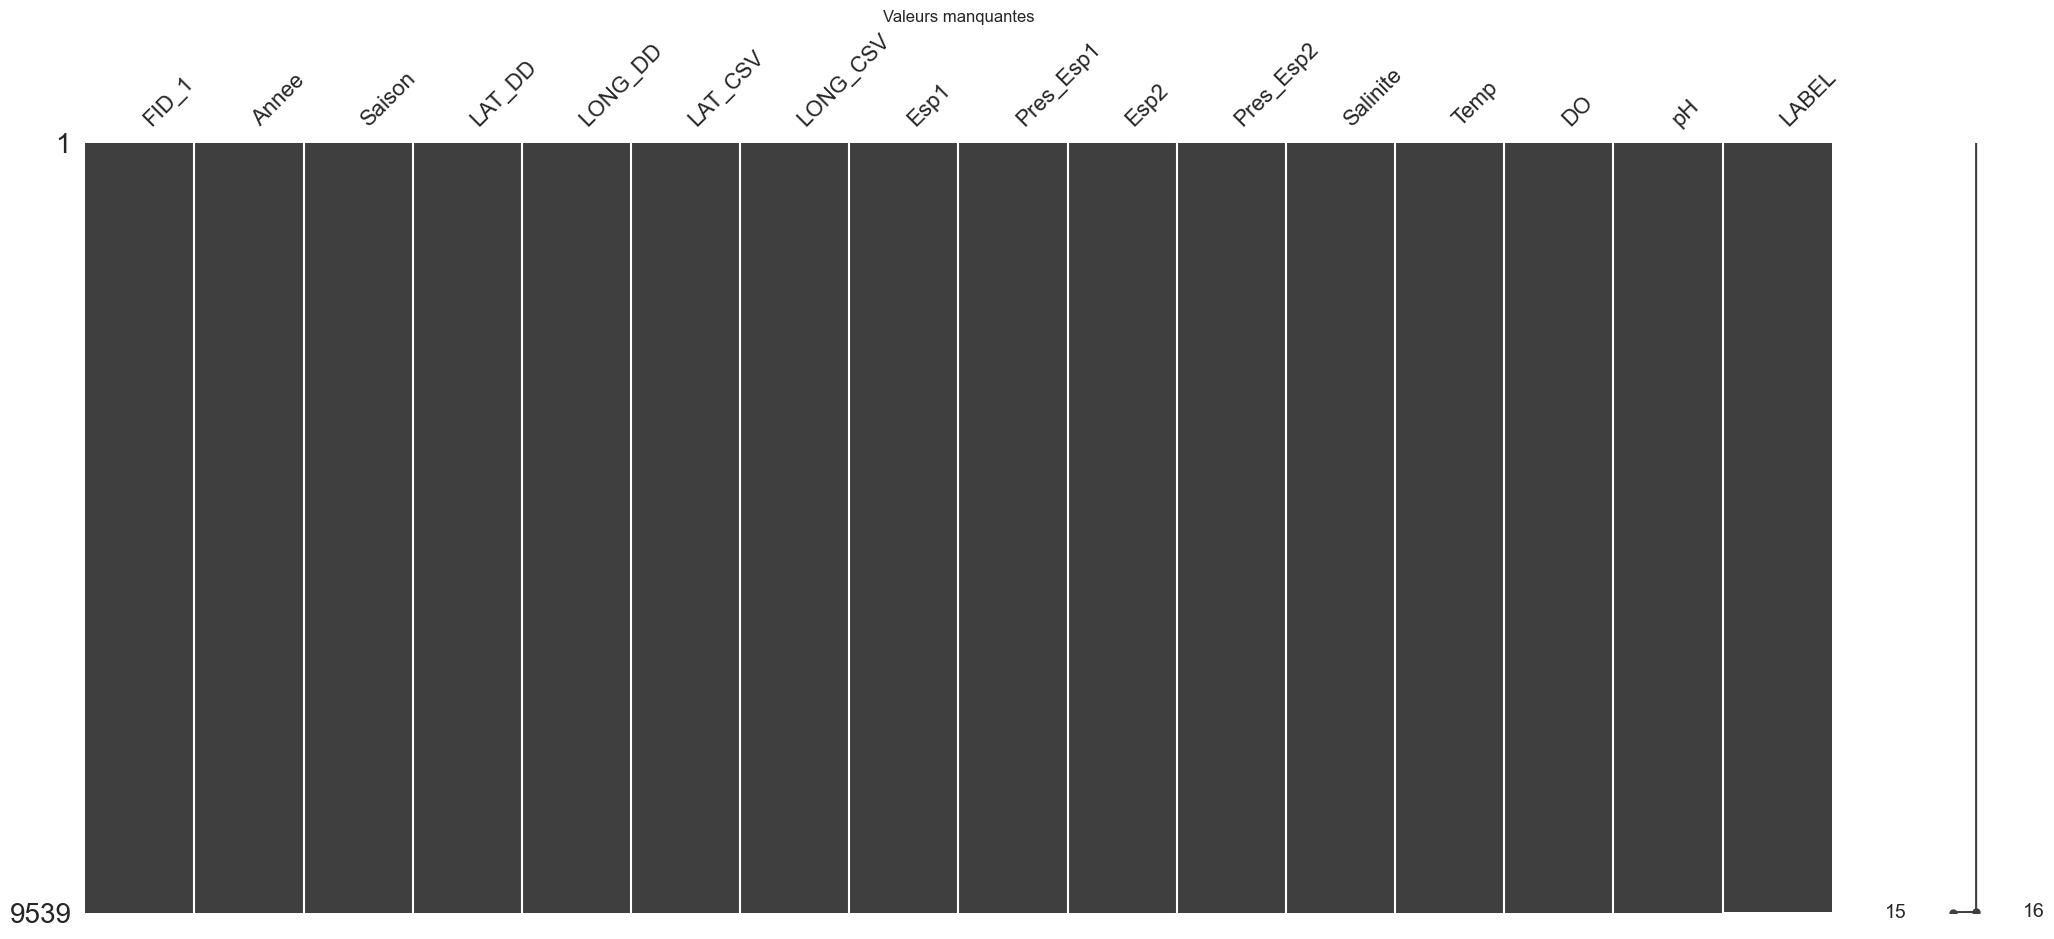

In [3]:
print("\nTypes de données :")
print(df.dtypes)

print("\nValeurs manquantes :")
print(df.isnull().sum())

# Visualisation des valeurs manquantes
msno.matrix(df)
plt.title("Valeurs manquantes")
plt.show()


In [4]:
# Colonnes à convertir (modifie selon les noms dans ton dataset)
num_cols = ['LONG_DD', 'LAT_DD', 'Salinite', 'Temp', 'DO', 'pH']

for col in num_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype(float)


In [5]:
df[num_cols].describe()


,LONG_DD,LAT_DD,Salinite,Temp,DO,pH
count,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000
mean,-12.820209,27.905132,36.176633,19.704182,5.065859,7.928019
std,3.406915,4.000431,0.222432,0.753940,0.096434,0.060297
min,-17.994440,20.894722,35.700000,17.030000,4.900000,7.779400
25%,-15.971806,24.597360,36.229000,19.230000,5.004000,7.919600
50%,-13.179444,28.100833,36.244000,19.630000,5.095000,7.949600
75%,-9.931389,30.938195,36.332000,20.380000,5.115000,7.979500
max,-5.920556,35.997220,36.355000,21.870000,5.299000,7.979900



Distribution de la cible :
Pres_Esp2
1    5803
0    3736
Name: count, dtype: int64
Pres_Esp2
1    0.608345
0    0.391655
Name: proportion, dtype: float64


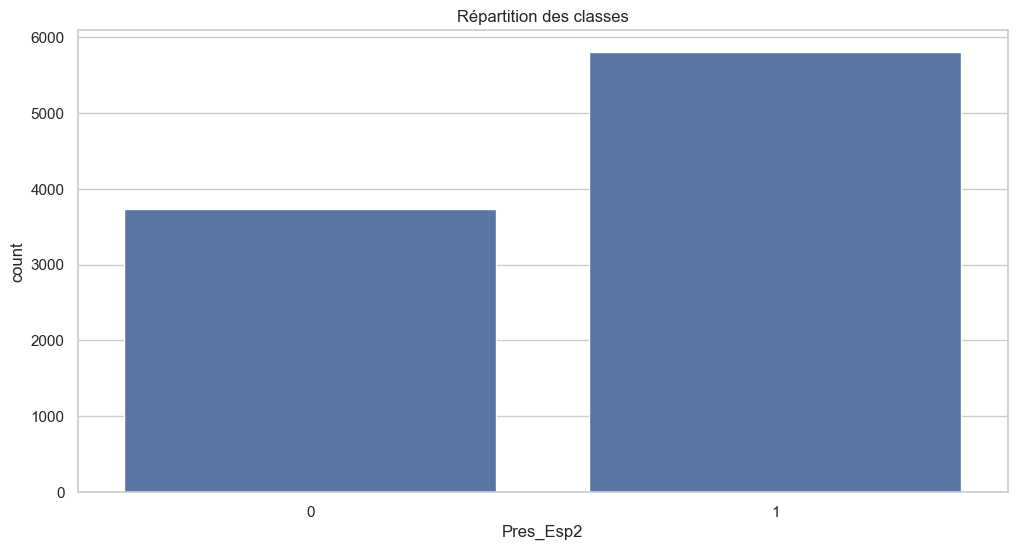

In [6]:
target = 'Pres_Esp2'

print("\nDistribution de la cible :")
print(df[target].value_counts())
print(df[target].value_counts(normalize=True))

# Affichage
sns.countplot(x=target, data=df)
plt.title("Répartition des classes")
plt.show()


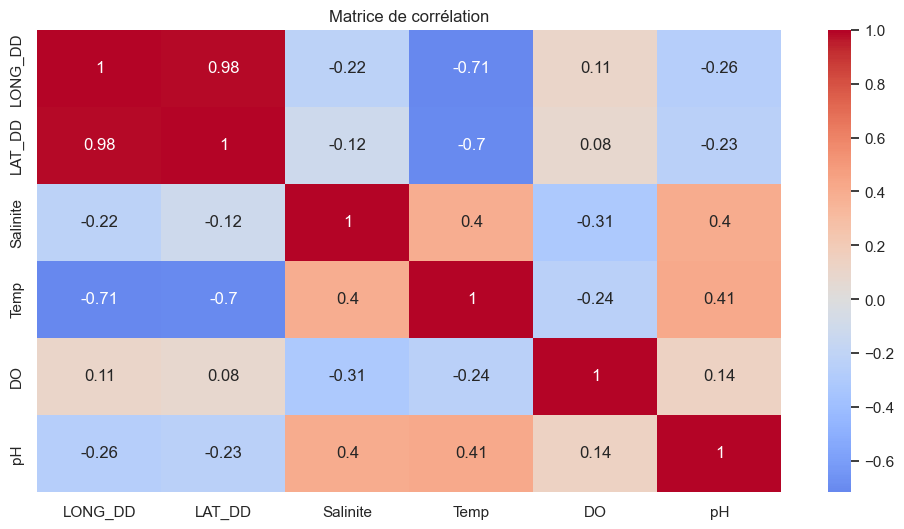

In [7]:
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()


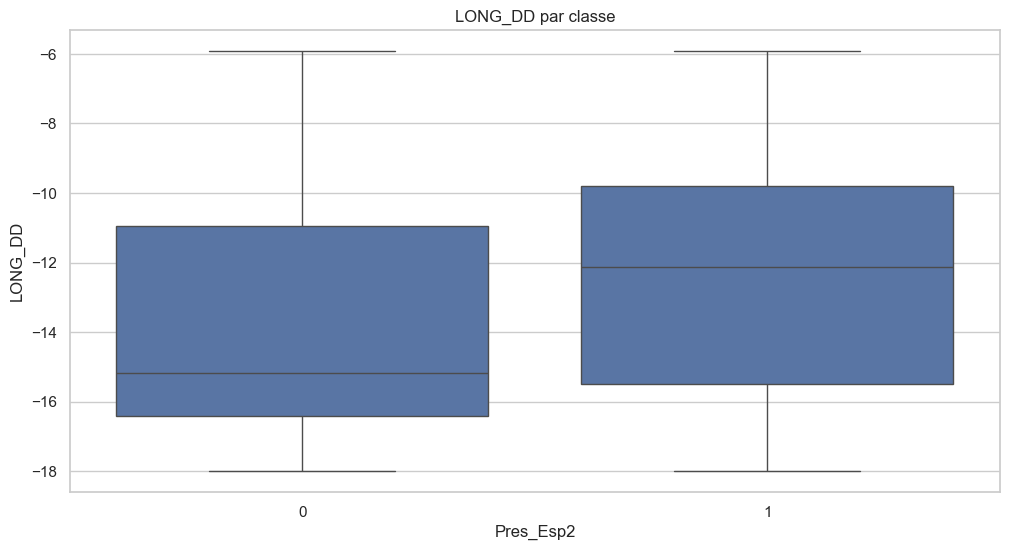

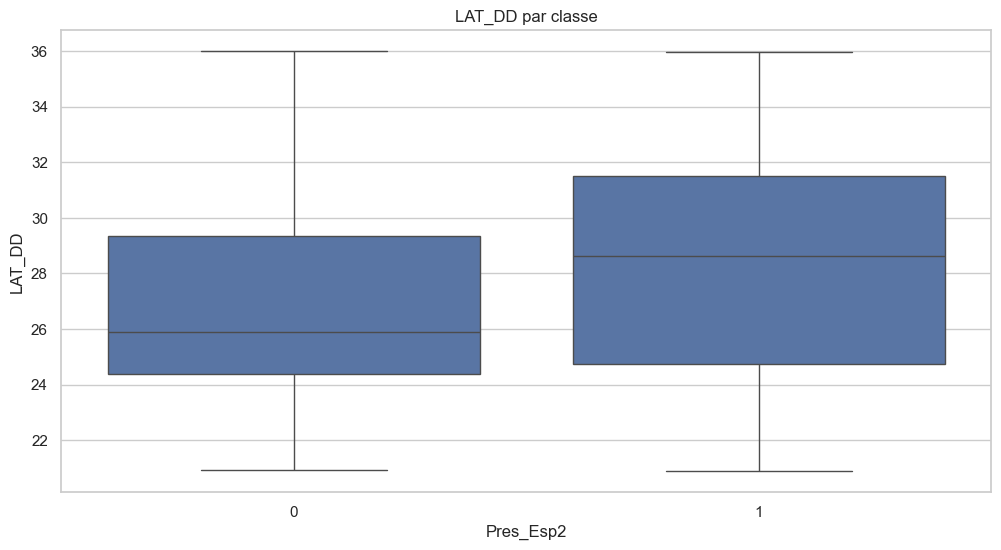

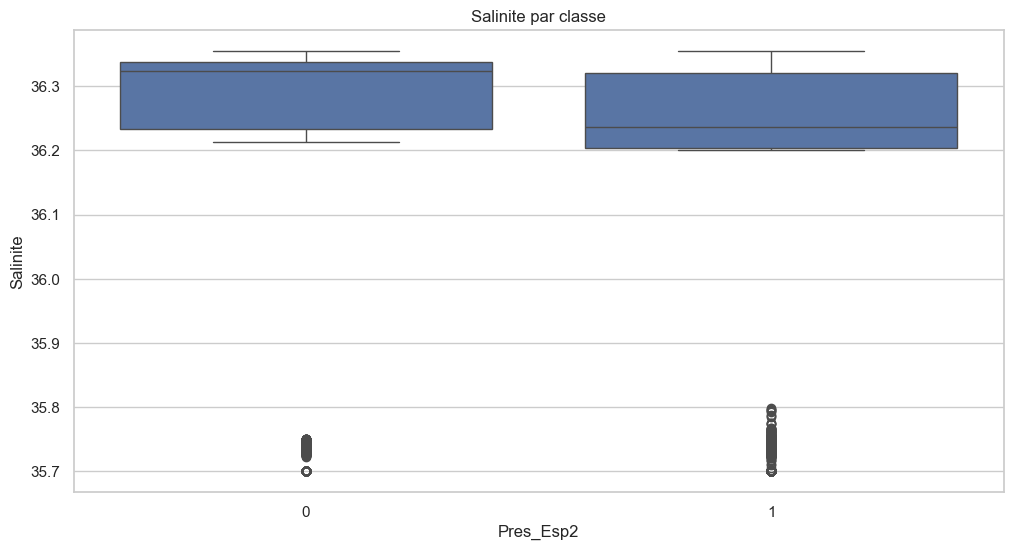

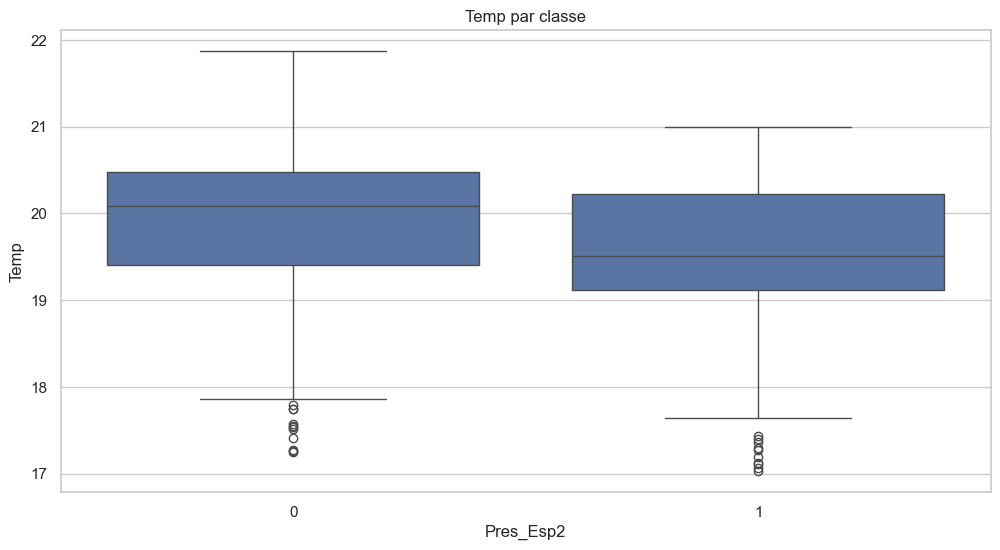

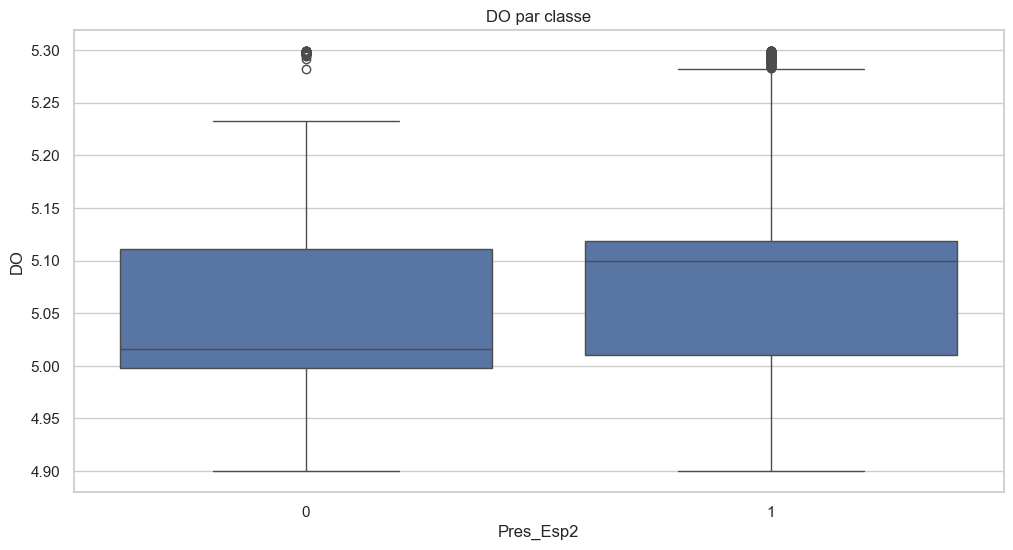

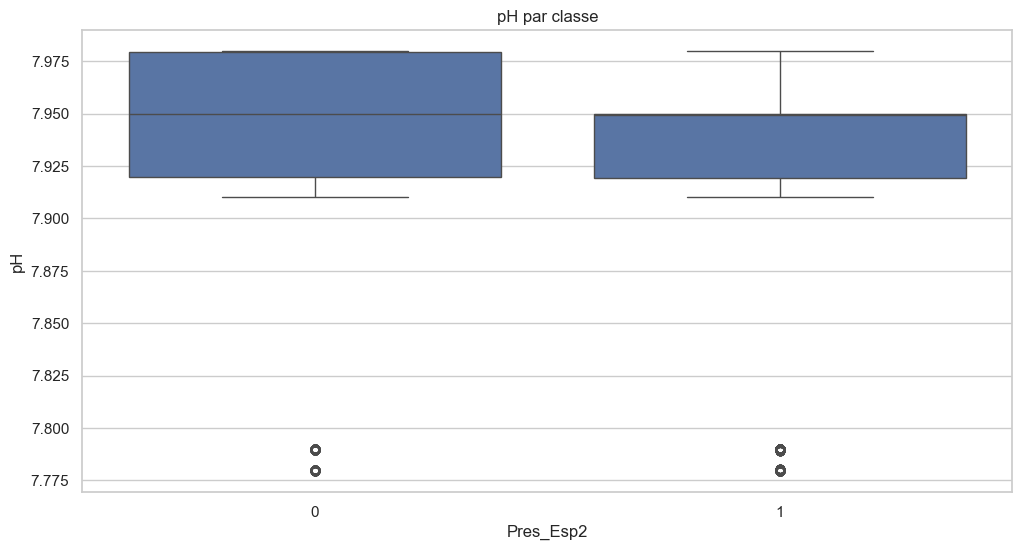

In [8]:
for col in num_cols:
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} par classe")
    plt.show()


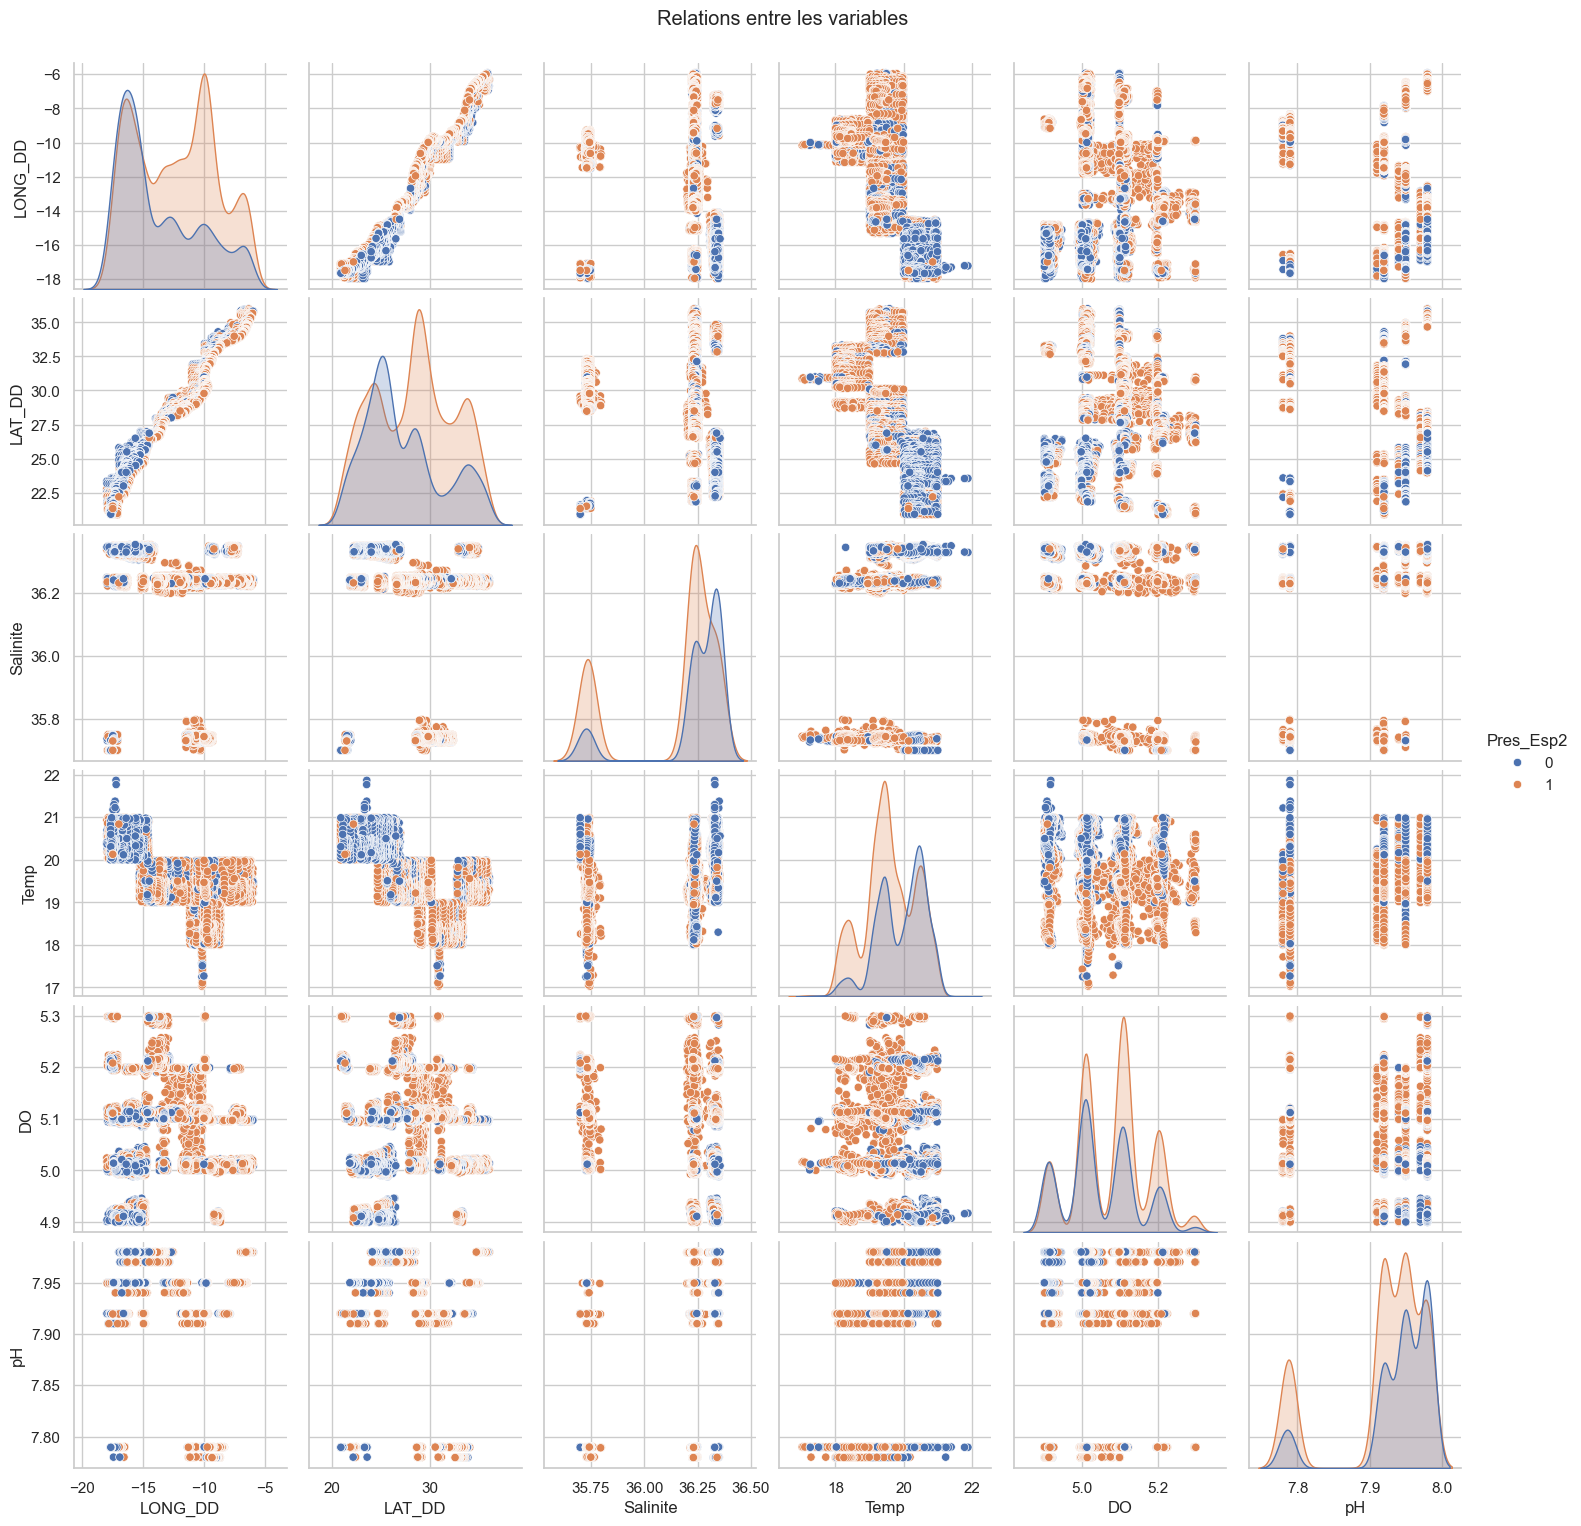

In [9]:
sns.pairplot(df[num_cols + [target]], hue=target)
plt.suptitle("Relations entre les variables", y=1.02)
plt.show()


In [10]:
# Variables explicatives
features = ['LAT_DD', 'LONG_DD', 'Salinite', 'Temp', 'DO', 'pH']
X = df[features]

# Variable cible
y = df['Pres_Esp2']


In [11]:
from sklearn.model_selection import train_test_split

# On conserve la proportion des classes avec stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)


Taille train : (6677, 6)
Taille test  : (2862, 6)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Vérification des nouvelles classes
print("Distribution après SMOTE :")
print(pd.Series(y_train_resampled).value_counts())


Distribution après SMOTE :
Pres_Esp2
1    4062
0    4062
Name: count, dtype: int64


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_auc_score, f1_score, balanced_accuracy_score
)
from imblearn.pipeline import Pipeline as ImbPipeline


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}



📊 Logistic Regression :
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1121
           1       0.77      0.75      0.76      1741

    accuracy                           0.71      2862
   macro avg       0.70      0.70      0.70      2862
weighted avg       0.72      0.71      0.71      2862



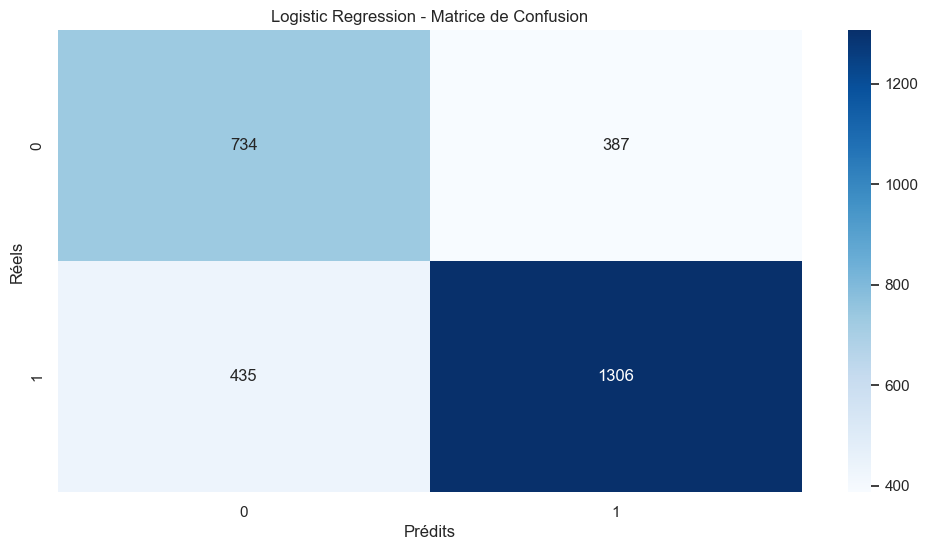


📊 Random Forest :
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1121
           1       0.88      0.86      0.87      1741

    accuracy                           0.84      2862
   macro avg       0.84      0.84      0.84      2862
weighted avg       0.85      0.84      0.84      2862



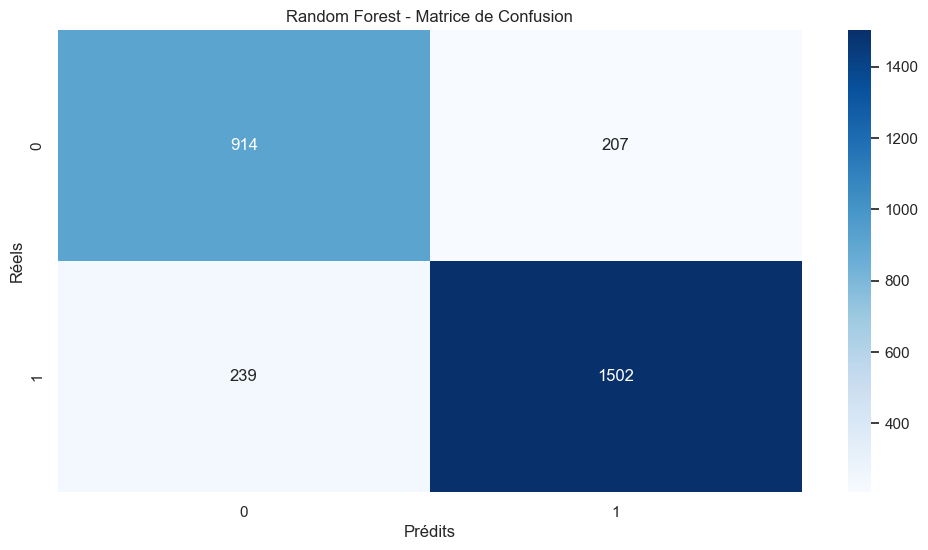


📊 SVM :
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1121
           1       0.77      0.73      0.75      1741

    accuracy                           0.70      2862
   macro avg       0.69      0.69      0.69      2862
weighted avg       0.71      0.70      0.70      2862



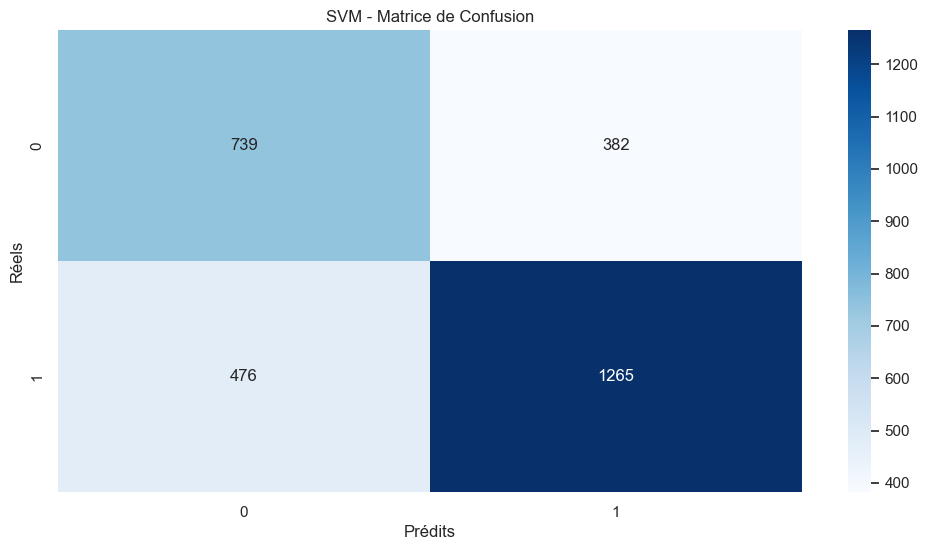


📊 KNN :
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1121
           1       0.82      0.73      0.77      1741

    accuracy                           0.74      2862
   macro avg       0.73      0.74      0.73      2862
weighted avg       0.75      0.74      0.74      2862



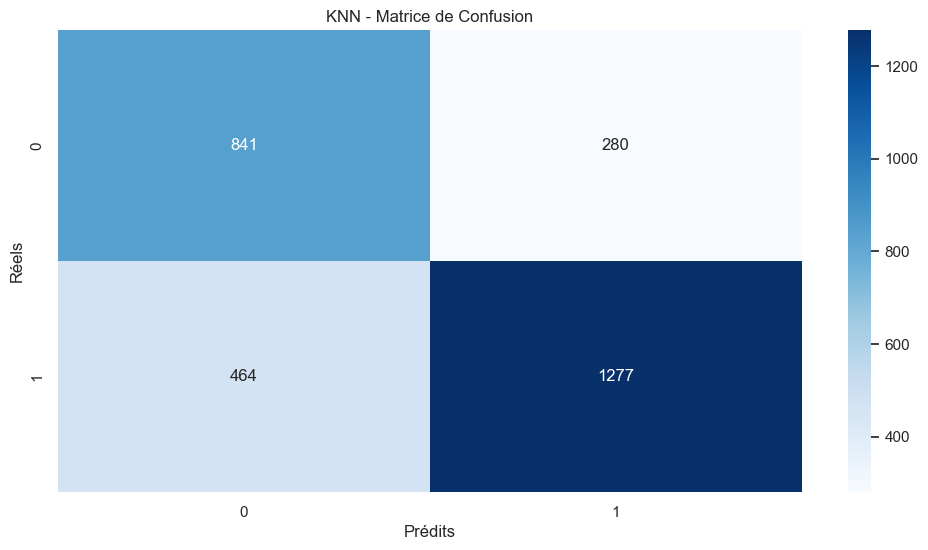


📊 XGBoost :
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1121
           1       0.87      0.84      0.85      1741

    accuracy                           0.82      2862
   macro avg       0.81      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862



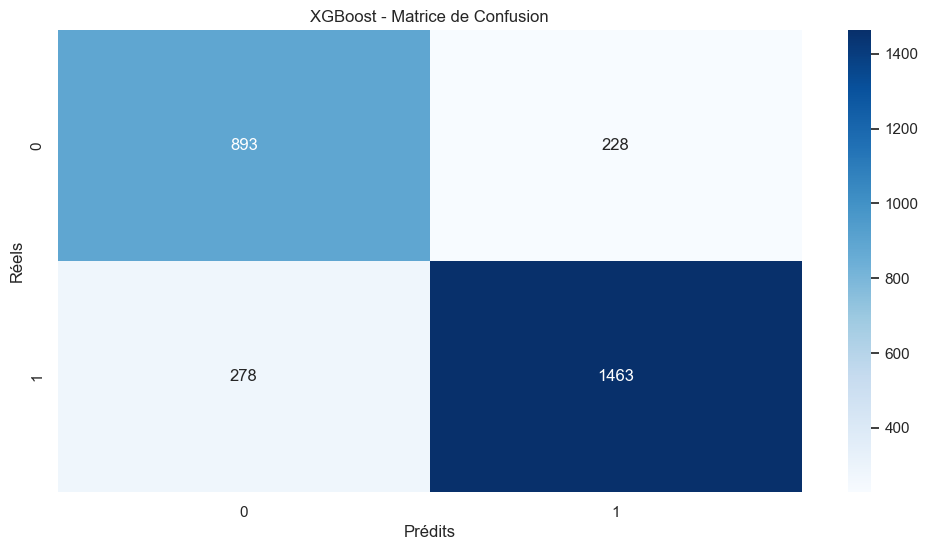

In [16]:
results = []

for name, model in models.items():
    # Pipeline avec SMOTE
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    # Validation croisée
    cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Entraînement
    pipeline.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test_scaled)
    y_prob = pipeline.predict_proba(X_test_scaled)[:, 1]
    
    # Métriques
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        'Model': name,
        'CV Accuracy Mean': np.mean(cv_scores),
        'CV Accuracy Std': np.std(cv_scores),
        'F1 Score': f1,
        'Balanced Accuracy': bal_acc,
        'ROC AUC': roc_auc
    })
    
    # Rapport
    print(f"\n📊 {name} :")
    print(classification_report(y_test, y_pred))
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Matrice de Confusion')
    plt.xlabel('Prédits')
    plt.ylabel('Réels')
    plt.show()


In [17]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='ROC AUC', ascending=False)
print("🔝 Résultats Comparatifs :")
print(results_df_sorted)


🔝 Résultats Comparatifs :
                 Model  CV Accuracy Mean  CV Accuracy Std  F1 Score  \
1        Random Forest          0.837502         0.009105  0.870725   
4              XGBoost          0.819681         0.005090  0.852564   
3                  KNN          0.731915         0.008383  0.774409   
2                  SVM          0.703311         0.011278  0.746753   
0  Logistic Regression          0.692679         0.012603  0.760629   

   Balanced Accuracy   ROC AUC  
1           0.839033  0.926609  
4           0.818466  0.906914  
3           0.741855  0.826124  
2           0.692913  0.782015  
0           0.702458  0.765574  


In [18]:
# Trouver le meilleur modèle selon le ROC AUC
best_model_name = results_df_sorted.iloc[0]['Model']
print(f"✅ Meilleur modèle sélectionné : {best_model_name}")


✅ Meilleur modèle sélectionné : Random Forest


In [19]:
# Grilles personnalisées selon le modèle
if best_model_name == "Random Forest":
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__bootstrap': [True, False]
    }
elif best_model_name == "XGBoost":
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
elif best_model_name == "SVM":
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    }
elif best_model_name == "Logistic Regression":
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'liblinear']
    }
elif best_model_name == "KNN":
    param_grid = {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    }


In [20]:
# Pipeline avec SMOTE
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', models[best_model_name])
])

# GridSearch
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
best_pipeline = grid_search.best_estimator_

print("✅ Meilleurs hyperparamètres :")
print(grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Meilleurs hyperparamètres :
{'model__bootstrap': False, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}



📋 Rapport final :
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1121
           1       0.89      0.88      0.89      1741

    accuracy                           0.86      2862
   macro avg       0.86      0.86      0.86      2862
weighted avg       0.86      0.86      0.86      2862



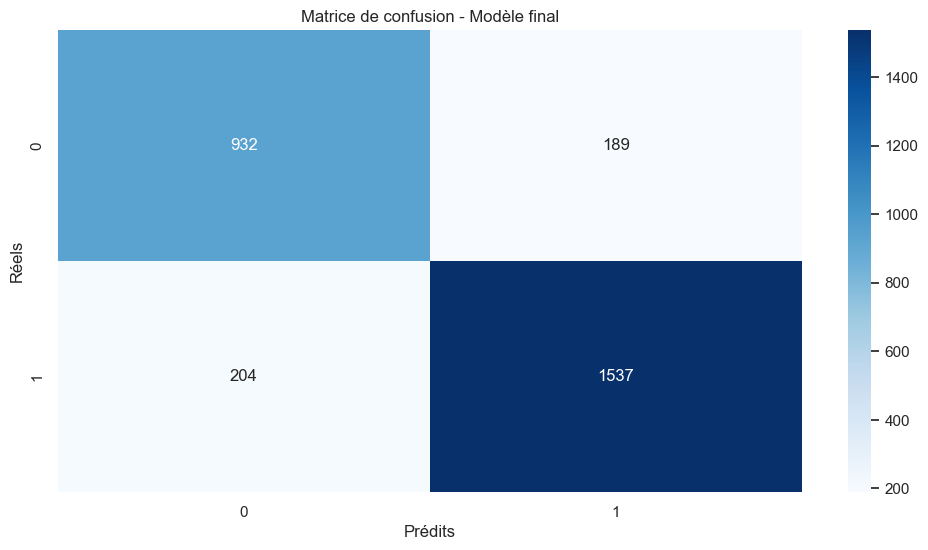

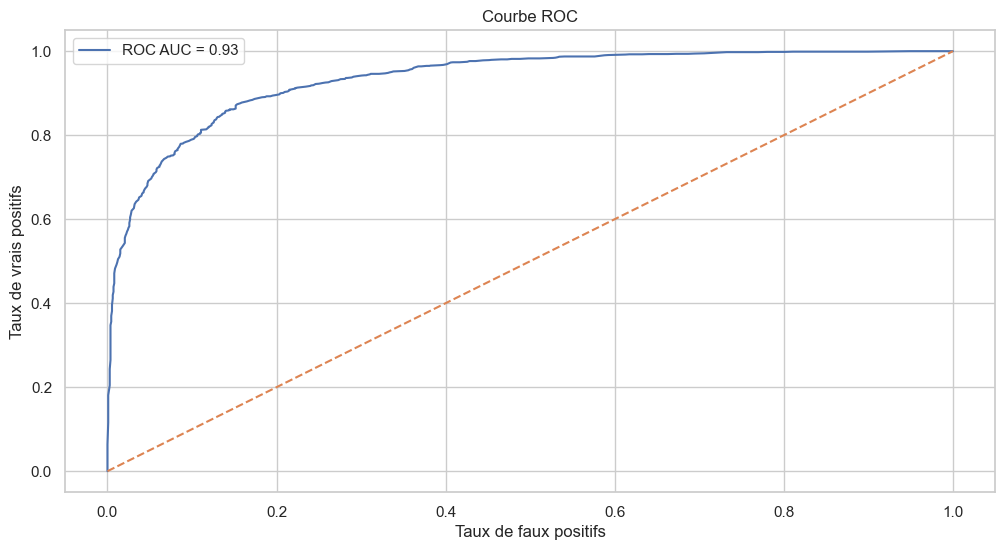

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_pipeline.predict(X_test_scaled)
y_prob = best_pipeline.predict_proba(X_test_scaled)[:, 1]

print("\n📋 Rapport final :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Modèle final')
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.show()

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()


In [23]:
import joblib

# Sauvegarde du pipeline complet (prétraitement + modèle)
joblib.dump(best_pipeline, 'Bspecies_prediction_ESP2_optimized.pkl')

# Sauvegarde du scaler séparément (optionnel)
joblib.dump(scaler, 'scaler.pkl') 

print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !
